In [28]:
import pandas as pd
from prophet import Prophet
from datetime import *
import numpy as np


from matplotlib import pyplot


from sklearn.metrics import mean_absolute_error



import matplotlib.pyplot as plt
from matplotlib import pyplot



In [33]:
df = pd.read_csv("wake5yravg.csv")
df["DateTime"] = pd.to_datetime(df.DateTime , format = '%m/%d/%Y %H:%M')
df.info()
data = df
data.index = df.DateTime
data = data.drop(["DateTime"], axis = 1)
data.info()
data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                8760 non-null   datetime64[ns]
 1   10 year hourly average  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2014-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   10 year hourly average  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


,10 year hourly average
DateTime,
2014-01-01 00:00:00,18.760
2014-01-01 01:00:00,17.775
2014-01-01 02:00:00,17.060
2014-01-01 03:00:00,16.794
2014-01-01 04:00:00,16.933
...,...
2014-12-31 19:00:00,23.876
2014-12-31 20:00:00,22.784
2014-12-31 21:00:00,21.759


In [45]:
#creating the train and validation set
train = data[:int(0.6*(len(data)))]
test = data[int(0.6*(len(data))):]

In [67]:
df1 = train
df1 = df1.reset_index(level = 0)

df1.rename(columns = {'10 year hourly average':'y'}, inplace = True)
df1.rename(columns = {'DateTime':'ds'}, inplace = True)

print(df1)
model_P = Prophet(yearly_seasonality = True, interval_width=0.95)
model_P.fit(df1)
future_dates = model_P.make_future_dataframe(periods=test.shape[0], freq ='H')
results_P = model_P.predict(future_dates[train.shape[0]:])
forecast_P = results_P.set_index('ds').yhat

                      ds       y
0    2014-01-01 00:00:00  18.760
1    2014-01-01 01:00:00  17.775
2    2014-01-01 02:00:00  17.060
3    2014-01-01 03:00:00  16.794
4    2014-01-01 04:00:00  16.933
...                  ...     ...
5251 2014-08-07 19:00:00  29.764
5252 2014-08-07 20:00:00  29.359
5253 2014-08-07 21:00:00  27.701
5254 2014-08-07 22:00:00  25.222
5255 2014-08-07 23:00:00  22.688

[5256 rows x 2 columns]


D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [59]:
df1

,ds,y
0,2014-01-01 00:00:00,18.760
1,2014-01-01 01:00:00,17.775
2,2014-01-01 02:00:00,17.060
3,2014-01-01 03:00:00,16.794
4,2014-01-01 04:00:00,16.933
...,...,...
5251,2014-08-07 19:00:00,29.764
5252,2014-08-07 20:00:00,29.359
5253,2014-08-07 21:00:00,27.701
5254,2014-08-07 22:00:00,25.222


,ds,y
DateTime,,
2014-01-01 00:00:00,2014-01-01 00:00:00,18.760
2014-01-01 01:00:00,2014-01-01 01:00:00,17.775
2014-01-01 02:00:00,2014-01-01 02:00:00,17.060
2014-01-01 03:00:00,2014-01-01 03:00:00,16.794
2014-01-01 04:00:00,2014-01-01 04:00:00,16.933
...,...,...
2014-12-31 19:00:00,2014-12-31 19:00:00,23.876
2014-12-31 20:00:00,2014-12-31 20:00:00,22.784
2014-12-31 21:00:00,2014-12-31 21:00:00,21.759


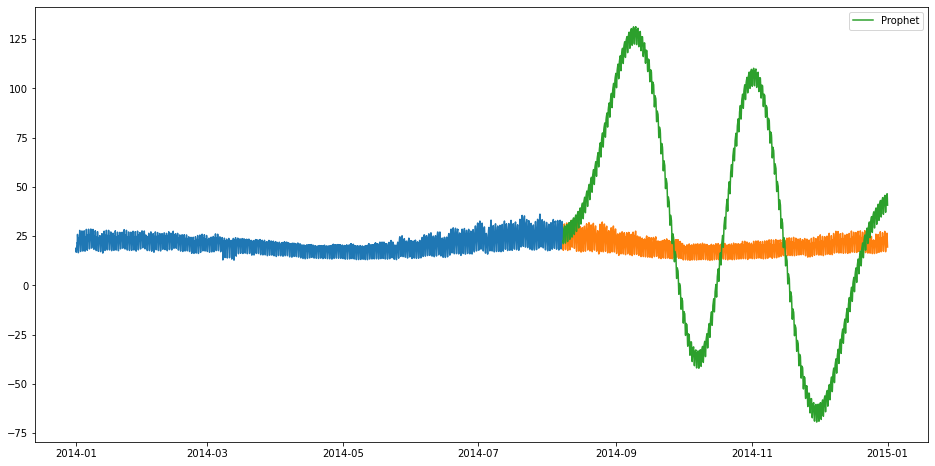

In [68]:
plt.figure(figsize=(16,8))
plt.plot(pd.concat([train,test]))
plt.plot(test.index, forecast_P, label='Prophet')

plt.legend()

In [44]:
train

,DateTime,10 year hourly average
DateTime,,
2014-01-01 00:00:00,2014-01-01 00:00:00,18.760
2014-01-01 01:00:00,2014-01-01 01:00:00,17.775
2014-01-01 02:00:00,2014-01-01 02:00:00,17.060
2014-01-01 03:00:00,2014-01-01 03:00:00,16.794
2014-01-01 04:00:00,2014-01-01 04:00:00,16.933
...,...,...
2014-08-07 19:00:00,2014-08-07 19:00:00,29.764
2014-08-07 20:00:00,2014-08-07 20:00:00,29.359
2014-08-07 21:00:00,2014-08-07 21:00:00,27.701


<Figure size 1152x576 with 0 Axes>

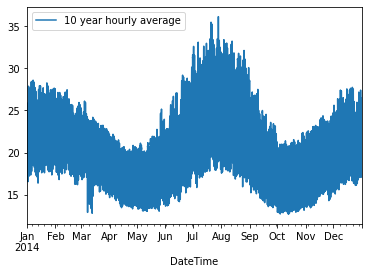

In [41]:
plt.figure(figsize=(16,8))
data.plot()
pyplot.show()

